<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    int32  
 1   island             344 non-null    int32  
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length

Text(95.72222222222221, 0.5, 'Actual')

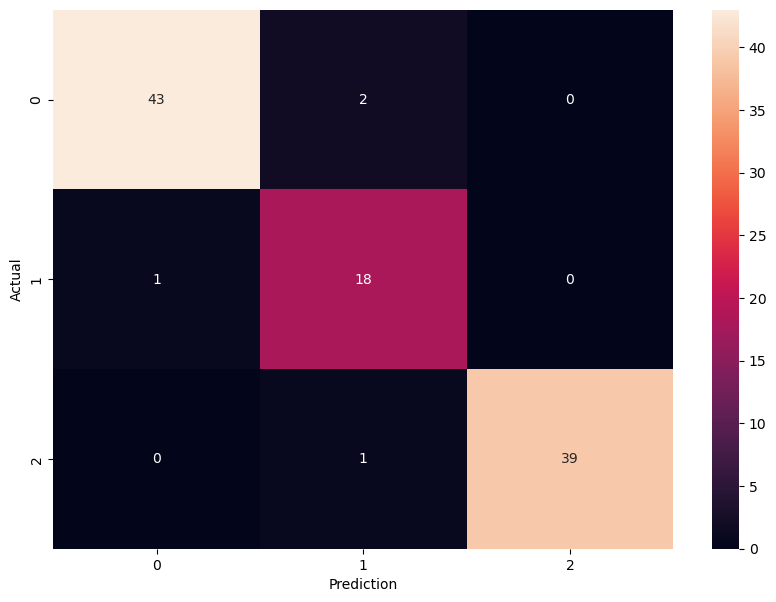

In [18]:
import pandas as pd
import numpy as np 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

df = sn.load_dataset('penguins')
df.sample(10)

df.info()

lb = LabelEncoder()
data = df
data['species'] = lb.fit_transform(data['species'])
data['island'] = lb.fit_transform(data['island'])
data['sex'] = lb.fit_transform(data['sex'])

data.info()



data.replace([np.Inf, -np.Inf], np.nan, inplace = True)
data.replace(np.nan, 0, inplace = True)

X = data
Y = X['species']
X.drop('species', axis = 1, inplace = True)

ms = MinMaxScaler()
X = ms.fit_transform(X)

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.3, random_state = 5)

model = RandomForestClassifier(n_estimators = 7, criterion = 'entropy', random_state = 0)

model.fit(xtrain, ytrain)

pred = model.predict(xtest)

cr = classification_report(ytest, pred)
print(cr)

cm = confusion_matrix(ytest, pred)

plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Prediction')
plt.ylabel('Actual')

In [8]:
from sklearn import tree
text_representation = tree.export_text(DC_tree)
print(text_representation)

|--- feature_3 <= 0.90
|   |--- feature_1 <= 0.71
|   |   |--- feature_2 <= 0.78
|   |   |   |--- class: 0
|   |   |--- feature_2 >  0.78
|   |   |   |--- class: 0
|   |--- feature_1 >  0.71
|   |   |--- feature_4 <= 0.65
|   |   |   |--- class: 1
|   |   |--- feature_4 >  0.65
|   |   |   |--- class: 0
|--- feature_3 >  0.90
|   |--- feature_2 <= 0.79
|   |   |--- class: 2
|   |--- feature_2 >  0.79
|   |   |--- class: 1



In [50]:

model = RandomForestClassifier()

model.fit(xtrain,ytrain)

pred1 = model.predict(xtest)

DC_tree= DecisionTreeClassifier()

DC_tree.fit(xtrain,ytrain)

pred2 = DC_tree.predict(xtest)

cr1 =classification_report(ytest, pred1)
print(cr1)

cr2 =classification_report(ytest, pred2)
print(cr2)



              precision    recall  f1-score   support

           0       0.98      0.96      0.97        45
           1       0.90      0.95      0.92        19
           2       1.00      1.00      1.00        40

    accuracy                           0.97       104
   macro avg       0.96      0.97      0.96       104
weighted avg       0.97      0.97      0.97       104

              precision    recall  f1-score   support

           0       0.93      0.96      0.95        45
           1       0.90      0.95      0.92        19
           2       1.00      0.95      0.97        40

    accuracy                           0.95       104
   macro avg       0.94      0.95      0.95       104
weighted avg       0.95      0.95      0.95       104



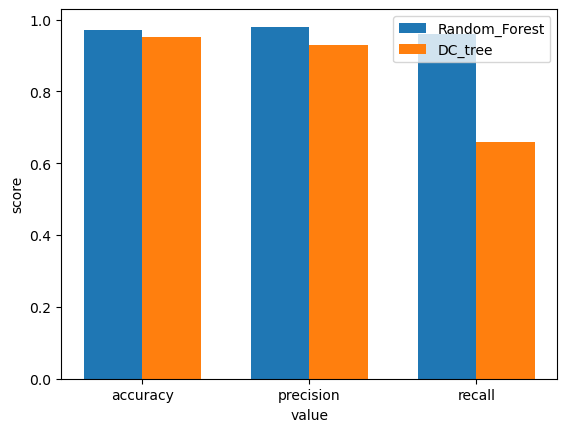

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# 데이터
labels = ['accuracy', 'precision', 'recall']
Random_Forest = [0.97, 0.98, 0.96]
DC_tree= [0.95, 0.93, 0.66]
x = np.arange(len(labels))
width = 0.35

# 그래프 그리기
plt.bar(x - width/2, Random_Forest, width, label='Random_Forest')
plt.bar(x + width/2, DC_tree, width, label='DC_tree')

# 세부 설정
plt.xticks(x, labels)
plt.xlabel('value')
plt.ylabel('score')
plt.legend()

# 그래프 표시
plt.show()
